## Data Manipulation and Visualization Food project

An *Exploratory Data Analysis* (EDA) helps to answer a lot of questions, ensuring the best outcomes for the project. It is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set.

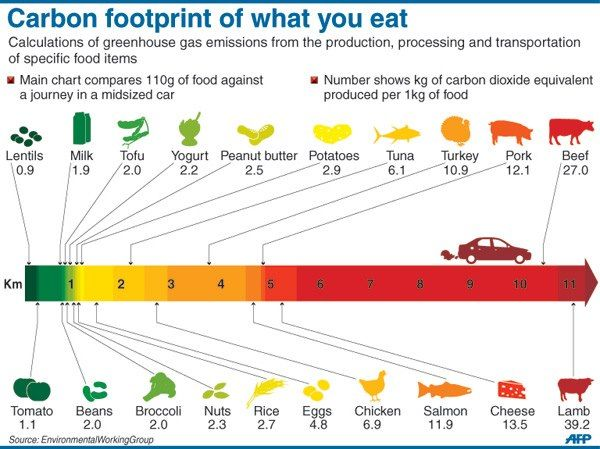

### Analysis of food and feed production and the enviroment impact

Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions to feed the world's growing population has become a hot topic for agriculture and food organizations, entrepreneurs, and philanthropists.
These solutions range from changing the way we grow and raise our food to changing the way we eat. 
 
To make matters more difficult, the Earth's climate is changing and is affected by agriculture. As the world's population has expanded and grown richer, the demand for food, energy, and water has seen a rapid increase.

Not only has the demand for all three increased, but they are also highly interconnected: food production requires water and energy; traditional energy production requires water resources; and agriculture provides a potential source of energy and lots of water. 
 
Ensuring that all people around the world have access to a nutritious diet in a sustainable way is one of the biggest challenges we face.
 
Objective:
From data inherent in the global production and distribution of food and feed, analyze the impact these have on the environment.

Data available:<br>
At this link, [Who eats the food we grow?](https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production) on the Kaggle website, the first useful dataset that provides an overview of our global food production, focusing on a comparison between food produced for human consumption and feed produced for animals.
This dataset is made available by the Food and Agriculture Organization of the United Nations, which provides free access to data on food and agriculture for over 245 countries and territories from the year 1961 to the most recent update(2013).

While the second useful dataset at this link [Environment Impact of Food Production](https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production) contains the 43 most common foods grown around the world and 23 columns describing values such as water use and greenhouse gas emissions(carbon footprints).


### Table of Contents   

* [Worldwide food\feed production and distribution](#1)
    * [1.1. Data description](#1.1.)
    * [1.2. Data cleaning and trasformation](#1.2.)
        * [1.2.1. All columns are usefull?](#1.2.1.)
        * [1.2.2. Variable categorization (count of numeric and categorical) and casting data](#1.2.2.)
        * [1.2.3. Are there any missing values?](#1.2.3.)
    * [2.1. Food and Feed  analysis](#2.1.)
        * [2.1.1. Ranking analysis by area: which countries have the biggest overall production?](#2.1.1.)
        * [2.1.2. What about the growth of the top 8 countries over the given period?](#2.1.2.)
        * [2.1.3. Ranking analysis by food/feed production](#2.1.3.)
        * [2.1.4. Food and feed plot for the largest producers(China, India, Usa)](#2.1.4.)
        * [2.1.5. Food and feed plot for most produced items](#2.1.5.)
        * [2.1.6. Food/feed production over the years: a costant increase or not?](#2.1.6.)
* [Environment Impact of Food Production](#2)
    * [3.1. Data description](#3.1.)
    * [3.2. Data cleaning and transformation](#3.2.)
    * [4.1. Data Analysis - Carbon footprint statistics](#4.1.)
        * [4.1.1. Total emission per food product](#4.1.1.)
        * [4.1.2. Greenhouse gas emissions across the supply chain](#4.1.2.)
        * [4.1.3. Impact of land use on emissions](#4.1.3.)
        * [4.1.4. Impact of water usage on emissions](#4.1.4.)
        * [4.1.5. Greenhouse Emissions](#4.1.5.)
        * [4.1.6. Scarcity-weighted water use](#4.1.6.)
        * [4.1.7. Eutrophication](#4.1.7.)
    * [5.1. Correlation: which variables influence total emissions?](#5.1.)
* [Conclusion](#3)

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import os
pd.set_option("display.max_columns", None) #I always prefer to see all columns
sns.set_theme()

In [2]:
# loading data
for dirname, _, filenames in os.walk("."):
    for filename in filenames:
        if filename.endswith(".csv"):
            print(os.path.join(dirname, filename))
print("Setup Complete")

.\FAO.csv
.\Food_Production.csv
Setup Complete


In [3]:
#Get the metadata (the .csv data) and put it into DataFrames
na_vals=["NA","Missing", "NaN", "None"]
df_FAO= pd.read_csv("FAO.csv",encoding= "latin1", na_values=na_vals)
df_Food_Production= pd.read_csv("Food_Production.csv")

<a id="1"> </a>
### Worldwide food\feed production and distribution

<a id="1.1."> </a>
#### 1.1 Data Description

Each row of this dataset contains the amount (values represent 1000 tonnes) of Feed/Food produced by each country ( "Area" ) from 1961 to 2013 for a particular Item.
There are 63 variables:<br>

* *Area Abbreviation: Country name abbreviation*
* *Area code: Code of each countries*
* *Area: Country names*
* *Item code: Food item code*
* *Item: Food item*
* *Element code: Food or Feed code*
* *Element: Food or Feed (Food - for production, Feed - for consumption)*
* *Unit: Unit of measurement (1000 tonnes)*
* *Latitude: Latitude number of respective countries*
* *Longitude: Longitude number of respective countries*
* *Y1961 - Y2013: production years that show the amount of food item produced and consumed in 1000 tonnes*

It’s a good idea to take a general look at the data itself.

In [4]:
#With the help of the head()  function of the Pandas library, you can easily check out the first lines of your DataFrame.
df_FAO.head()

Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude   Y1961   Y1962   Y1963   Y1964   Y1965   Y1966   Y1967   Y1968  \
0      67.71  1928.0  1904.0  1666.0  1950.0  2001.0  1808.0  2053.0  2045.0   
1      67.71   183.0   183.0   182.0   220.0   220.0   195.0   231.0   235.0   
2      67.71    76.0    76.0    76.0    76.0    76.0    75.0    71.0    72.0   
3      67.71   237.0   237.0   237.0   238.0   238.0   237.0   225.0   227.0   
4      67.71   210.0   210.0   214.0   216.0   216.0   216.0   235.0   232.0   

    Y1969   Y1970   Y1971   Y1972   Y1973   Y1974   Y1975   Y1976   Y1977  \
0  2154.0  1819.0  1963.0  2215.0  2310.0  2335.0  2434.0  2512.0  2282.0   
1   238.0   213.0   205.0   233.0   246.0   246.0   255.0   263.0   235.0   
2    73.0    74.0    71.0    70.0    72.0    76.0    77.0    80.0    60.0   
3   230.0   234.0   223.0   219.0   225.0   240.0   244.0   255.0   185.0   
4   236.0   200.0   201.0   216.0   228.0   231.0   234.0   240.0   228.0   

    Y1978   Y1979   Y1980   Y1981   Y1982   Y1983   Y1984   Y1985   Y1986  \
0  2454.0  2443.0  2129.0  2133.0  2068.0  1994.0  1851.0  1791.0  1683.0   
1   254.0   270.0   259.0   248.0   217.0   217.0   197.0   186.0   200.0   
2    65.0    64.0    64.0    60.0    55.0    53.0    51.0    48.0    46.0   
3   203.0   198.0   202.0   189.0   174.0   167.0   160.0   151.0   145.0   
4   234.0   228.0   226.0   210.0   199.0   192.0   182.0   173.0   170.0   

    Y1987   Y1988   Y1989   Y1990   Y1991   Y1992   Y1993   Y1994   Y1995  \
0  2194.0  1801.0  1754.0  1640.0  1539.0  1582.0  1840.0  1855.0  1853.0   
1   193.0   202.0   191.0   199.0   197.0   249.0   218.0   260.0   319.0   
2    46.0    47.0    46.0    43.0    43.0    40.0    50.0    46.0    41.0   
3   145.0   148.0   145.0   135.0   132.0   120.0   155.0   143.0   125.0   
4   154.0   148.0   137.0   144.0   126.0    90.0   141.0   150.0   159.0   

    Y1996   Y1997   Y1998   Y1999   Y2000   Y2001   Y2002   Y2003   Y2004  \
0  2177.0  2343.0  2407.0  2463.0  2600.0  2668.0  2776.0  3095.0  3249.0   
1   254.0   326.0   347.0   270.0   372.0   411.0   448.0   460.0   419.0   
2    44.0    50.0    48.0    43.0    26.0    29.0    70.0    48.0    58.0   
3   138.0   159.0   154.0   141.0    84.0    83.0   122.0   144.0   185.0   
4   108.0    90.0    99.0    72.0    35.0    48.0    89.0    63.0   120.0   

    Y2005   Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  Y2012  Y2013  
0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0  4711.0   4810   4895  
1   445.0   546.0   455.0   490.0   415.0   442.0   476.0    425    422  
2   236.0   262.0   263.0   230.0   379.0   315.0   203.0    367    360  
3    43.0    44.0    48.0    62.0    55.0    60.0    72.0     78     89  
4   208.0   233.0   249.0   247.0   195.0   178.0   191.0    200    200

One of the most elementary step  is  getting a basic description of dataset. A basic description of your data is indeed a very broad term: you can interpret it as a quick and dirty way to get some information on your data, as a way of getting some simple, easy-to-understand information on your data, to get a basic feel for your data.

In [5]:
# Use the describe() function to get various summary statistics that exclude NaN values.
df_FAO.describe()

Area Code     Item Code  Element Code      latitude     longitude  \
count  21477.000000  21477.000000  21477.000000  21477.000000  21477.000000   
mean     125.449411   2694.211529   5211.687154     20.450613     15.794445   
std       72.868149    148.973406    146.820079     24.628336     66.012104   
min        1.000000   2511.000000   5142.000000    -40.900000   -172.100000   
25%       63.000000   2561.000000   5142.000000      6.430000    -11.780000   
50%      120.000000   2640.000000   5142.000000     20.590000     19.150000   
75%      188.000000   2782.000000   5142.000000     41.150000     46.870000   
max      276.000000   2961.000000   5521.000000     64.960000    179.410000   

               Y1961          Y1962          Y1963          Y1964  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      195.262069     200.782250     205.464600     209.925577   
std      1864.124336    1884.265591    1861.174739    1862.000116   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%        21.000000      22.000000      23.000000      24.000000   
max    112227.000000  109130.000000  106356.000000  104234.000000   

               Y1965          Y1966          Y1967          Y1968  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      217.556751     225.988962     230.419222     238.415487   
std      2014.934333    2100.228354    2132.244717    2189.166883   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       2.000000   
75%        25.000000      26.000000      27.000000      28.000000   
max    119378.000000  118495.000000  118725.000000  127512.000000   

               Y1969          Y1970          Y1971          Y1972  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      244.340952     250.262237     254.238655     257.454677   
std      2266.964627    2322.967733    2372.627182    2421.964322   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       2.000000       2.000000       2.000000   
75%        29.000000      30.000000      30.000000      31.000000   
max    134937.000000  131871.000000  143407.000000  147793.000000   

               Y1973          Y1974          Y1975          Y1976  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      267.323336     267.126547     274.443528     276.573364   
std      2528.042608    2365.411987    2464.376834    2427.373749   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       2.000000       2.000000       2.000000   
75%        32.000000      33.000000      34.000000      35.000000   
max    142439.000000  118872.000000  123842.000000  126359.000000   

               Y1977          Y1978          Y1979          Y1980  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      285.963095     299.790166     305.835099     305.666072   
std      2555.249955    2757.473984    2768.374398    2730.433908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       2.000000       2.000000       3.000000   
75%        37.000000      38.000000      39.750000      41.000000   
max    128840.000000  142403.000000  147401.000000  151742.000000   

               Y1981          Y1982          Y1983          Y1984  \
count   17938.000000   17938.000000   17938.000000   17938.000000   
mean      311.656428     320.981157     326.911473


From the above statistical summary we could infer that:

* There are 21477 entries are in the dataset but in years columns we could see only 17938 entries in some columns which means there are *null* values
* The average values for the year columns is increasing year by year
* The minimum value and 25 percentile value are same for the years 1961-2011 but in the years 2012 and 2013 there are negative minimun values
* The minimum and median in the year columns are very similar and small while mean and maximum are bigger value. We can suppose that only few area contribute for the largest part of food and feed production



<a id="1.2."> </a>
#### 1.2. Data cleaning and trasformation

<a id="1.2.1."> </a>
#### 1.2.1. All columns are usefull?

More metadata are included such as *Area Abbreviation, Area/Item/Element Code, Unit, latitude, longitude,* that are useless in this analysis.

So I decide to erase these columns. The new dataset is reduced containg only columns: Area, Item, Element, Unit,  Y1961-Y2013

In [6]:
# erase columns with .drop()

df_FAO.drop(columns=["Area Abbreviation","Area Code","Item Code","Element Code","latitude","longitude"], inplace=True)

<a id="1.2.2."> </a>
#### 1.2.2. Variable categorization (count of numeric and categorical) and casting data

In [45]:
# First of all, casting data
cat_cols = df_FAO.select_dtypes(["object"]).columns
print("Count of categorical variables is",cat_cols.value_counts().sum())
num_cols = df_FAO.select_dtypes(["float64","int64"]).columns
print("Count of numerical variables is",num_cols.value_counts().sum())
df_FAO.info()

Count of categorical variables is 55
Count of numerical variables is 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     21477 non-null  object 
 1   Item     21477 non-null  object 
 2   Element  21477 non-null  object 
 3   Unit     21477 non-null  object 
 4   Y1961    21477 non-null  object 
 5   Y1962    21477 non-null  object 
 6   Y1963    21477 non-null  object 
 7   Y1964    21477 non-null  object 
 8   Y1965    21477 non-null  object 
 9   Y1966    21477 non-null  object 
 10  Y1967    21477 non-null  object 
 11  Y1968    21477 non-null  object 
 12  Y1969    21477 non-null  object 
 13  Y1970    21477 non-null  object 
 14  Y1971    21477 non-null  object 
 15  Y1972    21477 non-null  object 
 16  Y1973    21477 non-null  object 
 17  Y1974    21477 non-null  object 
 18  Y1975    21477 non-null  object 
 19  Y1976    21477 no

Four columns are object, all the year columns are float64 except the last two. I convert these columns from int to float


In [8]:
df_FAO["Y2012"] = df_FAO["Y2012"].astype(float)
df_FAO["Y2013"] = df_FAO["Y2013"].astype(float)

<a id="1.2.3."> </a>
#### 1.2.3. Are there any missing values?

Datasets of this kind mostly of the time contains missing values, represented by NaN.

Let's see if there are some missing values on this dataset.

Let's visualize bettere those missing values with helpful grahs


In [9]:
#Graph of missing values
msno.matrix(df_FAO, color=" 0.1")
msno.heatmap(df_FAO)
msno.dendrogram(df_FAO)

<AxesSubplot:>

These graphs tell us a lot of information of missing value occurrence:

* it's possible to visualize missing values represented by horizontal white lines
* only year-coloumns contain missing values
* only the last two years doesn't contain missing values
* it's possible to understand that there are a lot of them, the biggest part are before 1991. This is because in that period (end of cold war) a lot of new countries were born.

So I decide to make a deeper analysis of missing values for area


In [10]:
# Total number of missing values per year
print("Total number of missing values per year")
print("YEAR  MISSING VALUES")
print (df_FAO.loc[:, "Y1961":"Y2013"].isna().sum())

Total number of missing values per year
YEAR  MISSING VALUES
Y1961    3539
Y1962    3539
Y1963    3539
Y1964    3539
Y1965    3539
Y1966    3539
Y1967    3539
Y1968    3539
Y1969    3539
Y1970    3539
Y1971    3539
Y1972    3539
Y1973    3539
Y1974    3539
Y1975    3539
Y1976    3539
Y1977    3539
Y1978    3539
Y1979    3539
Y1980    3539
Y1981    3539
Y1982    3539
Y1983    3539
Y1984    3539
Y1985    3539
Y1986    3539
Y1987    3539
Y1988    3539
Y1989    3539
Y1990    3415
Y1991    3415
Y1992     987
Y1993     612
Y1994     612
Y1995     612
Y1996     612
Y1997     612
Y1998     612
Y1999     612
Y2000     349
Y2001     349
Y2002     349
Y2003     349
Y2004     349
Y2005     349
Y2006     104
Y2007     104
Y2008     104
Y2009     104
Y2010     104
Y2011     104
Y2012       0
Y2013       0
dtype: int64


In [11]:
df_FAO1 = df_FAO[df_FAO.isna().any(axis=1)]
df_FAO1.head()

Area                      Item Element         Unit  Y1961  Y1962  \
679  Armenia        Wheat and products    Feed  1000 tonnes    NaN    NaN   
680  Armenia        Wheat and products    Food  1000 tonnes    NaN    NaN   
681  Armenia  Rice (Milled Equivalent)    Feed  1000 tonnes    NaN    NaN   
682  Armenia  Rice (Milled Equivalent)    Food  1000 tonnes    NaN    NaN   
683  Armenia       Barley and products    Feed  1000 tonnes    NaN    NaN   

     Y1963  Y1964  Y1965  Y1966  Y1967  Y1968  Y1969  Y1970  Y1971  Y1972  \
679    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
680    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
681    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
682    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
683    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     Y1973  Y1974  Y1975  Y1976  Y1977  Y1978  Y1979  Y1980  Y1981  Y1982  \
679    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
680    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
681    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
682    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
683    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     Y1983  Y1984  Y1985  Y1986  Y1987  Y1988  Y1989  Y1990  Y1991  Y1992  \
679    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   14.0   
680    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  539.0   
681    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    0.0   
682    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   25.0   
683    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  115.0   

     Y1993  Y1994  Y1995  Y1996  Y1997  Y1998  Y1999  Y2000  Y2001  Y2002  \
679   21.0   24.0   25.0   10.0   32.0   58.0   55.0   78.0   20.0   20.0   
680  544.0  476.0  497.0  455.0  503.0  495.0  489.0  481.0  461.0  429.0   
681    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
682   19.0   17.0   10.0   10.0    7.0   11.0   10.0   10.0    9.0   13.0   
683   63.0   58.0   61.0   79.0   31.0   48.0   46.0   15.0   65.0   40.0   

     Y2003  Y2004  Y2005  Y2006  Y2007  Y2008  Y2009  Y2010  Y2011  Y2012  \
679   42.0   69.0   59.0   46.0   67.0   57.0   56.0   61.0   65.0   92.0   
680  443.0  490.0  433.0  445.0  412.0  428.0  391.0  372.0  386.0  377.0   
681    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
682   12.0   11.0   14.0   17.0   15.0   13.0   13.0   11.0    9.0    9.0   
683   53.0   68.0   57.0   33.0   86.0   76.0  102.0   86.0  124.0  121.0   

     Y2013  
679   93.0  
680  389.0  
681    0.0  
682    9.0  
683  137.0

In [12]:
#Total number of missing values for Area
values_per_area = df_FAO.pivot_table(index=["Area"], aggfunc="size")
df_missing_area = df_FAO1.pivot_table(index=["Area"], aggfunc="size")
print("Total number of missing values for Area")
df_missing_area

Total number of missing values for Area


Area
Armenia                                      133
Azerbaijan                                   124
Belarus                                      131
Belgium                                      136
Bosnia and Herzegovina                       124
Croatia                                      129
Czechia                                      129
Estonia                                      135
Ethiopia                                     116
Georgia                                      133
Kazakhstan                                   141
Kyrgyzstan                                   124
Latvia                                       136
Lithuania                                    140
Luxembourg                                   127
Montenegro                                   118
Oman                                         124
Republic of Moldova                          130
Russian Federation                           137
Serbia                                       127
Slovakia       

Countries shown in the list above represent the one for which there are missing values.

The biggest part are countries born after the dissolve of Jugoslavia and URSS

According to this constraint, different ways of proceeding may be taken into consideration. One is to compute analysis only from 1993 where there are a less amount of missing values and computing analisys only for the last 2 decade 1993-2013. The other way is to considering all the years removing from analysis the missing rows and so the missing countries. There is even the possibility to substitute NaN with 0

I decide to substitute missing values with 0 in order to make ranking and then considering only the last 21 years, due to a less amount of missing values limiting this constraint.


In [13]:
df_FAO= df_FAO.fillna("0") # sostitution of NaN values with zero
df_FAO_lastyears = df_FAO.drop(df_FAO.loc[:, "Y1961":"Y1992"], axis = 1) #erase year-columns from 1961 to 1992

The new dataframe filter from 1993 looks like this:

In [14]:
df_FAO_lastyears.head()

Area                      Item Element         Unit   Y1993   Y1994  \
0  Afghanistan        Wheat and products    Food  1000 tonnes  1840.0  1855.0   
1  Afghanistan  Rice (Milled Equivalent)    Food  1000 tonnes   218.0   260.0   
2  Afghanistan       Barley and products    Feed  1000 tonnes    50.0    46.0   
3  Afghanistan       Barley and products    Food  1000 tonnes   155.0   143.0   
4  Afghanistan        Maize and products    Feed  1000 tonnes   141.0   150.0   

    Y1995   Y1996   Y1997   Y1998   Y1999   Y2000   Y2001   Y2002   Y2003  \
0  1853.0  2177.0  2343.0  2407.0  2463.0  2600.0  2668.0  2776.0  3095.0   
1   319.0   254.0   326.0   347.0   270.0   372.0   411.0   448.0   460.0   
2    41.0    44.0    50.0    48.0    43.0    26.0    29.0    70.0    48.0   
3   125.0   138.0   159.0   154.0   141.0    84.0    83.0   122.0   144.0   
4   159.0   108.0    90.0    99.0    72.0    35.0    48.0    89.0    63.0   

    Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010   Y2011   Y2012  \
0  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0  4711.0  4810.0   
1   419.0   445.0   546.0   455.0   490.0   415.0   442.0   476.0   425.0   
2    58.0   236.0   262.0   263.0   230.0   379.0   315.0   203.0   367.0   
3   185.0    43.0    44.0    48.0    62.0    55.0    60.0    72.0    78.0   
4   120.0   208.0   233.0   249.0   247.0   195.0   178.0   191.0   200.0   

    Y2013  
0  4895.0  
1   422.0  
2   360.0  
3    89.0  
4   200.0

From the above statistical summary we found that the average values of last two attributes were in negative values. We can see that they are casued only by Japan

In [15]:
df_FAO_lastyears.iloc[10082,[0,23,24]]

Area     Japan
Y2012   -169.0
Y2013   -246.0
Name: 10082, dtype: object

We don't know if is a human error or a correction of other values of previous year, so I decide to leave them in the dataset

<a id="2.1."> </a>
#### 2.1. Food and Feed  analysis

Now I want to make two different analysis:by food/feed production and by area 

<a id="2.1.1."> </a>
#### 2.1.1. Ranking analysis by area: which countries have the biggest overall production?

In [16]:
year_list = list(df_FAO_lastyears.iloc[:,4:].columns)
area_list = list(df_FAO_lastyears["Area"].unique())
df_area = df_FAO_lastyears.groupby("Area")[year_list].apply(lambda x : x.sum()) #for each country sum over years for Food&Feed
#add two columns, Sum_produce e Rank in order to make ranking
df_area["Sum_Produce_byarea"] = df_area.agg("sum", axis="columns")
df_area["Rank"] = df_area["Sum_Produce_byarea"].rank(ascending=False)
df_area.sort_values(by="Rank",inplace=True) #ranking order
df_area.head(8)

Y1993      Y1994      Y1995      Y1996  \
Area                                                                   
China, mainland           1522331.0  1605487.0  1718202.0  1816327.0   
India                      758811.0   780455.0   808109.0   823412.0   
United States of America   850575.0   913340.0   851713.0   906255.0   
Brazil                     269658.0   285793.0   310646.0   296138.0   
Russian Federation         409393.0   353898.0   338005.0   320115.0   
Nigeria                    163872.0   168625.0   174843.0   177779.0   
Germany                    205382.0   206518.0   207780.0   211402.0   
Japan                      214086.0   213836.0   215630.0   212967.0   

                              Y1997      Y1998      Y1999      Y2000  \
Area                                                                   
China, mainland           1851318.0  1919109.0  2008790.0  2164099.0   
India                      856044.0   907653.0   949204.0   934346.0   
United States of America   910904.0   921577.0   939541.0   964963.0   
Brazil                     304748.0   301059.0   311399.0   332274.0   
Russian Federation         335851.0   294507.0   293114.0   310241.0   
Nigeria                    183924.0   191588.0   195305.0   199382.0   
Germany                    205932.0   209584.0   206727.0   217063.0   
Japan                      212604.0   205237.0   207324.0   205273.0   

                              Y2001      Y2002      Y2003      Y2004  \
Area                                                                   
China, mainland           2219943.0  2300071.0  2314540.0  2374847.0   
India                      951943.0   932637.0   964933.0   958430.0   
United States of America   951203.0   937972.0   962709.0   997495.0   
Brazil                     322017.0   333042.0   335122.0   353635.0   
Russian Federation         346387.0   328948.0   337315.0   358233.0   
Nigeria                    201770.0   215594.0   223755.0   238685.0   
Germany                    213744.0   219432.0   209830.0   215978.0   
Japan                      203979.0   203459.0   200301.0   199021.0   

                              Y2005      Y2006      Y2007      Y2008  \
Area                                                                   
China, mainland           2432309.0  2439722.0  2527905.0  2653346.0   
India                      988532.0  1056344.0  1120149.0  1164815.0   
United States of America   982124.0   948891.0   965464.0   936095.0   
Brazil                     357158.0   376499.0   384071.0   423546.0   
Russian Federation         357155.0   366983.0   352277.0   391224.0   
Nigeria                    248917.0   264276.0   260195.0   268276.0   
Germany                    217398.0   217313.0   215849.0   221273.0   
Japan                      199075.0   195615.0   195712.0   190337.0   

                              Y2009      Y2010      Y2011      Y2012  \
Area                                                                   
China, mainland           2744815.0  2865116.0  2994756.0  3108577.0   
India                     1166783.0  1226850.0  1267739.0  1295189.0   
United States of America   929625.0   909478.0   892416.0   910537.0   
Brazil                     410338.0   429110.0   449439.0   439247.0   
Russian Federation         357694.0   324189.0   377675.0   347165.0   
Nigeria                    257785.0   275614.0   295836.0   297791.0   
Germany                    222413.0   210659.0   214165.0   215798.0   
Japan                      188600.0   185552.0   186917.0   190471.0   

                              Y2013 Sum_Produce_byarea  Rank  
Area                                                          
China, mainland           3191155.0         48772765.0   1.0  
India                     1336593.0         21248971.0   2.0  
United States of America   938639.0         19521516.0   3.0  
Brazil                     439967.0          7464906.0   4.0  
Russian Federation         370913.0          72

We see that the 5 countries that produce more are in order:China, India, Usa, Brazil, Russian Federation

<a id="2.1.2."> </a>
#### 2.1.2. What about the growth of the top 8 countries over the given period?

Now we make a plot for annual produce of these countries with quantity in y-axis and years in x-axis

In [17]:
df_area.drop(columns=["Sum_Produce_byarea", "Rank"], inplace=True)
fig = px.line(df_area.head(8).T, color="Area", markers="Area", labels={"index": "Year","value": "Production"}, title="Total annual production over years")
fig.show()

Clearly, China, India and US stand out here. So, these are the countries with most food and feed production. 
It not surprisingly appeared as China is the country with the biggest amount of Food and Feed production, it is the most populous country in the world and also one of the biggest, with over 1 billion people to feed, there are a lot of food to produce. China is followed by India and Usa respectively 2nd and 3rd most populous countries. It is logical to think that this rank isn't affected only by the amount of population of a country, but also by GDP, total cultivable area, and geographical position.
We can also notice that China's growth is increasing rapidly while growth of India is also increasing but not as like China growth and  the growth of 'USA' is stationary

Now, let's have a closer look at  food and feed data

<a id="2.1.3."> </a>
#### 2.1.3. Ranking analysis by food/feed production

In [18]:
#Food and feed plot for dataset from 1993
sns.catplot("Element", data=df_FAO_lastyears, kind="count")
plt.grid(True)
plt.show()

So, there is a huge difference in food and feed production. Now, we have obvious assumptions about the following plots after looking at this huge difference.

<a id="2.1.4."> </a>
#### 2.1.4. Food and feed plot for the largest producers(China, India, Usa)

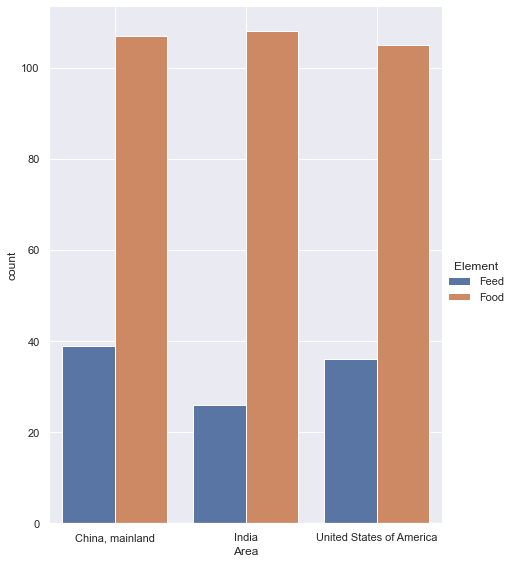

In [19]:
sns.catplot("Area", data=df_FAO_lastyears[(df_FAO_lastyears["Area"] == "India") | (df_FAO_lastyears["Area"] == "China, mainland") | (df_FAO_lastyears["Area"] == "United States of America")], kind="count", hue="Element", size=8, aspect=.8)
plt.grid(True)

There is a huge difference between feed and food production. These countries' total production and their ranks depend on feed production. Food Production is similar

<a id="2.1.5."> </a>
####  2.1.5. Food and feed plot for most produced items

Now, we create another dataframe with items and their total production each year from 1993 to 2013

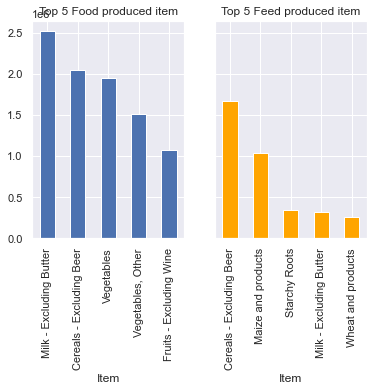

In [20]:
#Rank of most Produced Items 
df_item = df_FAO_lastyears.pivot_table(values=year_list, columns="Element",index=["Item"], aggfunc="sum")
df_item = df_item.T
#FOOD
df_food_item = df_item.xs("Food", level=1, axis=0)
df_food_item = df_food_item.sum(axis=0).sort_values(ascending=False).head()
#FEED
df_feed_item = df_item.xs("Feed", level=1, axis=0)
df_feed_item = df_feed_item.sum(axis=0).sort_values(ascending=False).head()
#Plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df_food_item.plot(kind="bar", title="Top 5 Food produced item", color="b", ax=ax1)
df_feed_item.plot(kind="bar", title="Top 5 Feed produced item", color="orange" , ax=ax2)
plt.grid(True)

From the calculation appears how milk is the most produced food item in the world from 1960 to 2013, followed by cereals and vegetables, while regarding feed intended to animals, cereals and maize are the most produced items.

<a id="2.1.6."> </a>
#### 2.1.6. Food/feed production over the years: a costant increase or not?

<AxesSubplot:>

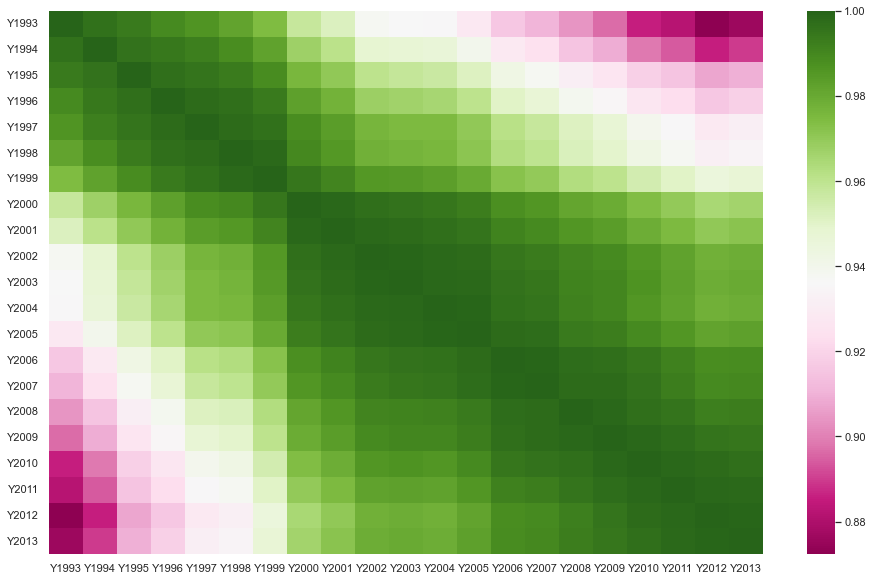

In [21]:
#Now, we plot a heatmap of correlation of production in different years
year_df = df_FAO_lastyears.iloc[:,4:].astype(float)
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax, cmap="PiYG")

So, we gather that a given year's production is more similar to its immediate previous and immediate following years.This means that while the world population is increasing, the world food/feed production is increasing too probably not considering enough the impact of this. The next part of this analysis goes through the enviroment impact of food production

<a id="2"> </a>
### Environment Impact of Food Production

We have developed a complex system of producing more and more animals that use more and more of our resources, while leaving a massive amount of waste, pollution and adverse climate change in their way. This notebook focuses on the environmental impacts of food.
This dataset focuses on the environmental impacts of food

First step is getting a basic description of dataset

In [22]:
# Use the describe() function to get various summary statistics that exclude NaN values.
df_Food_Production.describe()   

Land use change  Animal Feed       Farm  Processing  Transport  \
count        43.000000    43.000000  43.000000   43.000000  43.000000   
mean          1.260465     0.453488   3.469767    0.253488   0.195349   
std           3.357730     0.919200   7.083264    0.372475   0.158795   
min          -2.100000     0.000000   0.100000    0.000000   0.000000   
25%           0.000000     0.000000   0.350000    0.000000   0.100000   
50%           0.200000     0.000000   0.800000    0.100000   0.100000   
75%           0.800000     0.000000   2.200000    0.300000   0.200000   
max          16.300000     2.900000  39.400000    1.300000   0.800000   

        Packging     Retail  Total_emissions  \
count  43.000000  43.000000        43.000000   
mean    0.269767   0.069767         5.972093   
std     0.342633   0.110270        10.501753   
min     0.000000   0.000000         0.200000   
25%     0.100000   0.000000         0.850000   
50%     0.100000   0.000000         1.600000   
75%     0.300000   0.150000         6.000000   
max     1.600000   0.300000        59.600000   

       Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
count                                          33.000000          
mean                                           27.181547          
std                                            46.445959          
min                                             0.708419          
25%                                             4.214932          
50%                                             7.000000          
75%                                            26.324324          
max                                           197.357143          

       Eutrophying emissions per kilogram (gPO₄eq per kilogram)  \
count                                          38.000000          
mean                                           46.141316          
std                                            82.808808          
min                                             0.690000          
25%                                             3.752500          
50%                                            11.460000          
75%                                            45.840000          
max                                           365.290000          

       Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)  \
count                                          27.000000                       
mean                                           52.771953                       
std                                            52.033823                       
min                                             3.384338                       
25%                                            17.855335                       
50%                                            37.333333                       
75%                                            55.297183                       
max                                           185.050659                       

       Freshwater withdrawals per 1000kcal (liters per 1000kcal)  \
count                                          30.000000           
mean                                          504.188977           
std                                           539.130695           
min                                             0.723982           
25%                                           106.927557           
50%                                           338.059413           
75%                                           694.805356           
max                                          2062.178771           

       Freshwater withdrawals per 100g protein (liters per 100g protein)  \
count                                          26.000000                   
mean                                         1437.975324                   
std                                          1441.981970                   
min                                            32.375000              

<a id="3.1."> </a>
#### 3.1. Data description

This dataset contains most 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.
Columns:<br>
* *Land use change - Kg CO2 - equivalents per kg product*
* *Animal Feed - Kg CO2 - equivalents per kg product*
* *Farm - Kg CO2 - equivalents per kg product*
* *Processing - Kg CO2 - equivalents per kg producté*
* *Transport - Kg CO2 - equivalents per kg product*
* *Packaging - Kg CO2 - equivalents per kg product*
* *Retail - Kg CO2 - equivalents per kg product*

These represent greenhouse gas emissions per kg of food product(Kg CO2 - equivalents per kg product) across different stages in the lifecycle of food production.

*Eutrophication* – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.

It’s a good idea to take a general look at the data itself.

In [23]:
# With the help of the head()  function of the Pandas library, you can easily check out the first lines of your DataFrame.
df_Food_Production.head()

Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                           4.281357          
4                                           9.514379          

   Eutrophying emissions per kilogram (gPO₄eq per kilogram)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                              11.23          
4                                              35.07          

   Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)  \
0                                                NaN                       
1                                                NaN                       
2                                                NaN                       
3                                           8.638462                       
4                                          49.394366                       

   Freshwater withdrawals per 1000kcal (liters per 1000kcal)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                         183.911552           
4                                         609.983722           

   Freshwater withdrawals per 100g protein (liters per 100g protein)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                         371.076923                   
4                                        3166.760563                   

   Freshwater withdrawals per kilogram (liters per kilogram)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                              482.4           
4                                             2248.4           

   Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                           0.945482              
4                                           1.207271              

   Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                           1.907692                      
4                                           6.267606          

<a id="3.2."> </a>
#### 3.2. Data cleaning and transformation

In [24]:
df_Food_Production_info= pd.DataFrame({"Dtype": df_Food_Production.dtypes, "Unique": df_Food_Production.nunique(), "Missing%": (df_Food_Production.isnull().sum()/df_Food_Production.shape[0])*100})
df_Food_Production_info

Dtype  Unique   Missing%
Food product                                         object      43   0.000000
Land use change                                     float64      21   0.000000
Animal Feed                                         float64      10   0.000000
Farm                                                float64      24   0.000000
Processing                                          float64      10   0.000000
Transport                                           float64       8   0.000000
Packging                                            float64      10   0.000000
Retail                                              float64       4   0.000000
Total_emissions                                     float64      33   0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per ...  float64      33  23.255814
Eutrophying emissions per kilogram (gPO₄eq per ...  float64      38  11.627907
Eutrophying emissions per 100g protein (gPO₄eq ...  float64      27  37.209302
Freshwater withdrawals per 1000kcal (liters per...  float64      30  30.232558
Freshwater withdrawals per 100g protein (liters...  float64      26  39.534884
Freshwater withdrawals per kilogram (liters per...  float64      38  11.627907
Greenhouse gas emissions per 1000kcal (kgCO₂eq ...  float64      33  23.255814
Greenhouse gas emissions per 100g protein (kgCO...  float64      27  37.209302
Land use per 1000kcal (m² per 1000kcal)             float64      33  23.255814
Land use per kilogram (m² per kilogram)             float64      38  11.627907
Land use per 100g protein (m² per 100g protein)     float64      27  37.209302
Scarcity-weighted water use per kilogram (liter...  float64      38  11.627907
Scarcity-weighted water use per 100g protein (l...  float64      26  39.534884
Scarcity-weighted water use per 1000kcal (liter...  float64      30  30.232558

The command above tells us that this dataset has only quantitative variables, except the first column *Food product*, which has unique (different type of food) qualitative variables.

I am going to upload the dataset again but this time I will do some refactoring:

* reindex the dataframe by defining the "Food product" column as the index column (since it is the only column tohold categorical data)
* There are several NaN values. I am going to replace them with zero since it is not reasonable to insert any mean or rounded values because we are referring to different type of food.


In [25]:
df_Food_Production = pd.read_csv("Food_Production.csv",index_col = "Food product")

# Replace the columns headers having spaces in between the words
df_Food_Production.rename(columns = {"Land use change": "LandUseChange", 
                     "Animal feed": "AnimalFeed",
                     "Total_emissions": "TotalEmissions"}, 
            inplace = True)

# Replace the NaN with 0
df_Food_Production = df_Food_Production.fillna(0)

df_Food_Production.head()

LandUseChange  Animal Feed  Farm  Processing  Transport  \
Food product                                                                   
Wheat & Rye (Bread)            0.1          0.0   0.8         0.2        0.1   
Maize (Meal)                   0.3          0.0   0.5         0.1        0.1   
Barley (Beer)                  0.0          0.0   0.2         0.1        0.0   
Oatmeal                        0.0          0.0   1.4         0.0        0.1   
Rice                           0.0          0.0   3.6         0.1        0.1   

                     Packging  Retail  TotalEmissions  \
Food product                                            
Wheat & Rye (Bread)       0.1     0.1             1.4   
Maize (Meal)              0.1     0.0             1.1   
Barley (Beer)             0.5     0.3             1.1   
Oatmeal                   0.1     0.0             1.6   
Rice                      0.1     0.1             4.0   

                     Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
Food product                                                                    
Wheat & Rye (Bread)                                           0.000000          
Maize (Meal)                                                  0.000000          
Barley (Beer)                                                 0.000000          
Oatmeal                                                       4.281357          
Rice                                                          9.514379          

                     Eutrophying emissions per kilogram (gPO₄eq per kilogram)  \
Food product                                                                    
Wheat & Rye (Bread)                                               0.00          
Maize (Meal)                                                      0.00          
Barley (Beer)                                                     0.00          
Oatmeal                                                          11.23          
Rice                                                             35.07          

                     Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)  \
Food product                                                                                 
Wheat & Rye (Bread)                                           0.000000                       
Maize (Meal)                                                  0.000000                       
Barley (Beer)                                                 0.000000                       
Oatmeal                                                       8.638462                       
Rice                                                         49.394366                       

                     Freshwater withdrawals per 1000kcal (liters per 1000kcal)  \
Food product                                                                     
Wheat & Rye (Bread)                                           0.000000           
Maize (Meal)                                                  0.000000           
Barley (Beer)                                                 0.000000           
Oatmeal                                                     183.911552           
Rice                                                        609.983722           

                     Freshwater withdrawals per 100g protein (liters per 100g protein)  \
Food product                                                                             
Wheat & Rye (Bread)                                           0.000000                   
Maize (Meal)                                                  0.000000                   
Barley (Beer)                                                 0.000000                   
Oatmeal                                                     371.076923                   
Rice                                                       3166.760563                   

                     Freshwater withdrawals per kilogram (l

<a id="4.1."> </a>
#### 4.1. Data Analysis - Carbon footprint statistics

Now we want to analize data distribution, frequency and density.
First, I am going to analyze the TotalEmissions column data from statistical point of view.

In [26]:
df_Food_Production["TotalEmissions"].describe(include = "all")

count    43.000000
mean      5.972093
std      10.501753
min       0.200000
25%       0.850000
50%       1.600000
75%       6.000000
max      59.600000
Name: TotalEmissions, dtype: float64

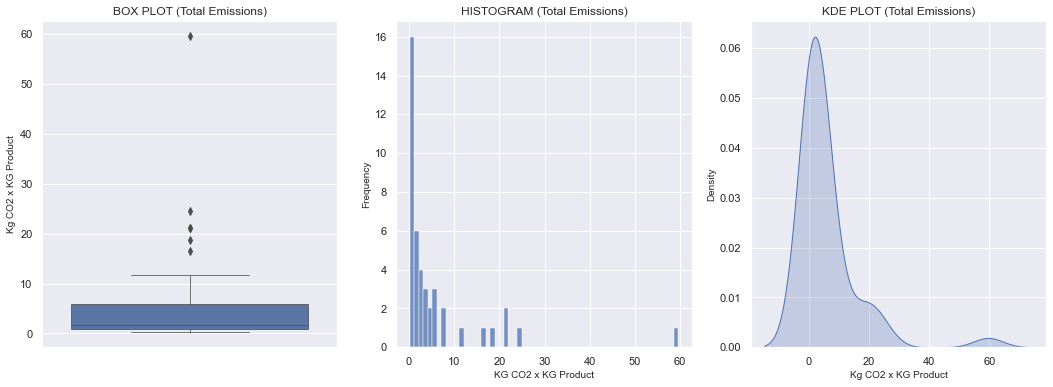

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(131)

box = sns.boxplot(y = "TotalEmissions", data=df_Food_Production, orient = "v", linewidth=0.75)

box.set_ylabel("Kg CO2 x KG Product",fontsize = 10)
box.set_title("BOX PLOT (Total Emissions)")

plt.subplot(132)

hist = sns.histplot(df_Food_Production["TotalEmissions"], bins = 60)

hist.set_title("HISTOGRAM (Total Emissions)")
hist.set_xlabel("KG CO2 x KG Product",fontsize = 10)
hist.set_ylabel("Frequency",fontsize = 10)

plt.subplot(133)

kde = sns.kdeplot(df_Food_Production["TotalEmissions"],
                   shade = True,
                   color = "b")

kde.set_title("KDE PLOT (Total Emissions)")
kde.set_xlabel("Kg CO2 x KG Product",fontsize = 10)
kde.set_ylabel("Density",fontsize = 10)
plt.grid(True)
plt.show()


Let's first analyse the content of the box plot (left side)

Note that the box is placed where the amount of total emission, on average, is highest.

The diplayed box plot shows that:

* There are lines extending on either side of the box plot. They tell us that some data exists a little off from the max concentration.
* Most emissions are between 0,85 to 6 KG CO2 emission on an average per KG of produced food.
* The average number of emission is around 1,6 KG CO2 emission , shown by the box middle line.
* Some food products in this dataset have a total emission of more than 15 Kg CO2 per kg product(outliers)

The other two functions, displayed next to the box plot, show the Histogram and Kernel Density Estimation curve of total emissions data. From the following operation on the *TotalEmissions* column (contains the calculated total emission in Kg CO2 per given food product), I can see that most of the time, total emissions value is in the range 0-0.6 and from the kde curve it can be seen that the most frequently observed value is about 0.3.

<a id="4.1.1."> </a>
#### 4.1.1. Total emission per food product

At this point, I am ready to build some graphs and visualize dataset's content.

First, I am going to give evidence of total carbon footprint trend among different product types.

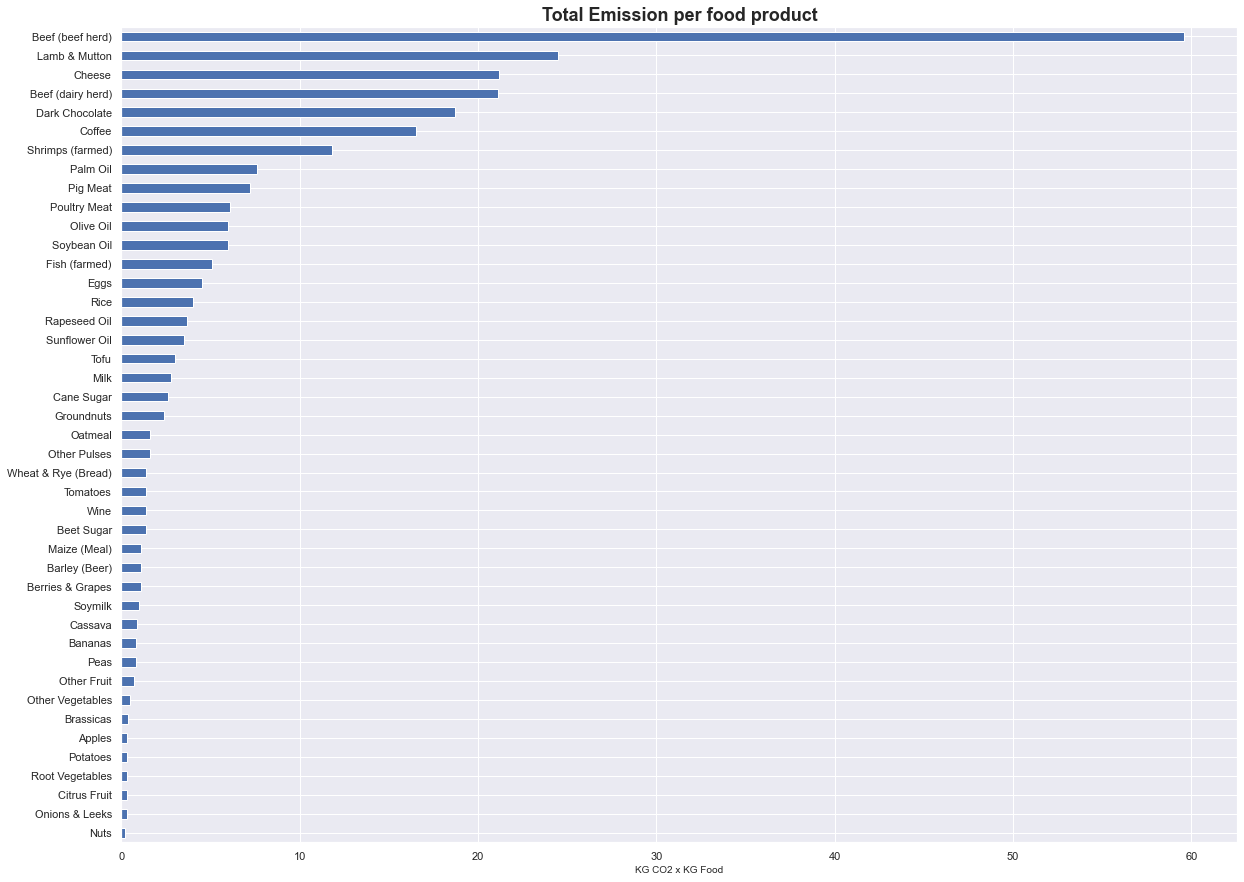

In [28]:
df_Food_Production= df_Food_Production.sort_values(["TotalEmissions"])

plt.subplots(figsize = (20,15))

df_Food_Production.TotalEmissions.plot(kind = "barh")

plt.title("Total Emission per food product",fontsize = 18, fontweight = "bold")
plt.xlabel("KG CO2 x KG Food",fontsize = 10)
plt.ylabel("")
plt.grid(True)
plt.show()

By looking at this graph, we can notice that there are some food products in this dataset who have a total emission of more than 15 Kg CO2 per kg of produced product, such as: beef, lamb & mutton, cheese, dark chocolate and coffee. They can be considered as the products with the highest carbon footprint.<br>
Remarking two points:
* Beef is responsible for most of the greenhouse gas emissions.
* Plant based foods are highly visible in the graph indicating their significanly low carbon footprint.

<a id="4.1.2."> </a>
#### 4.1.2. Greenhouse gas emissions across the supply chain

Stages of supply chain are:

* Land usage
* Farm
* Animal Feed
* Processing
* Transport
* Retail
* Packaging


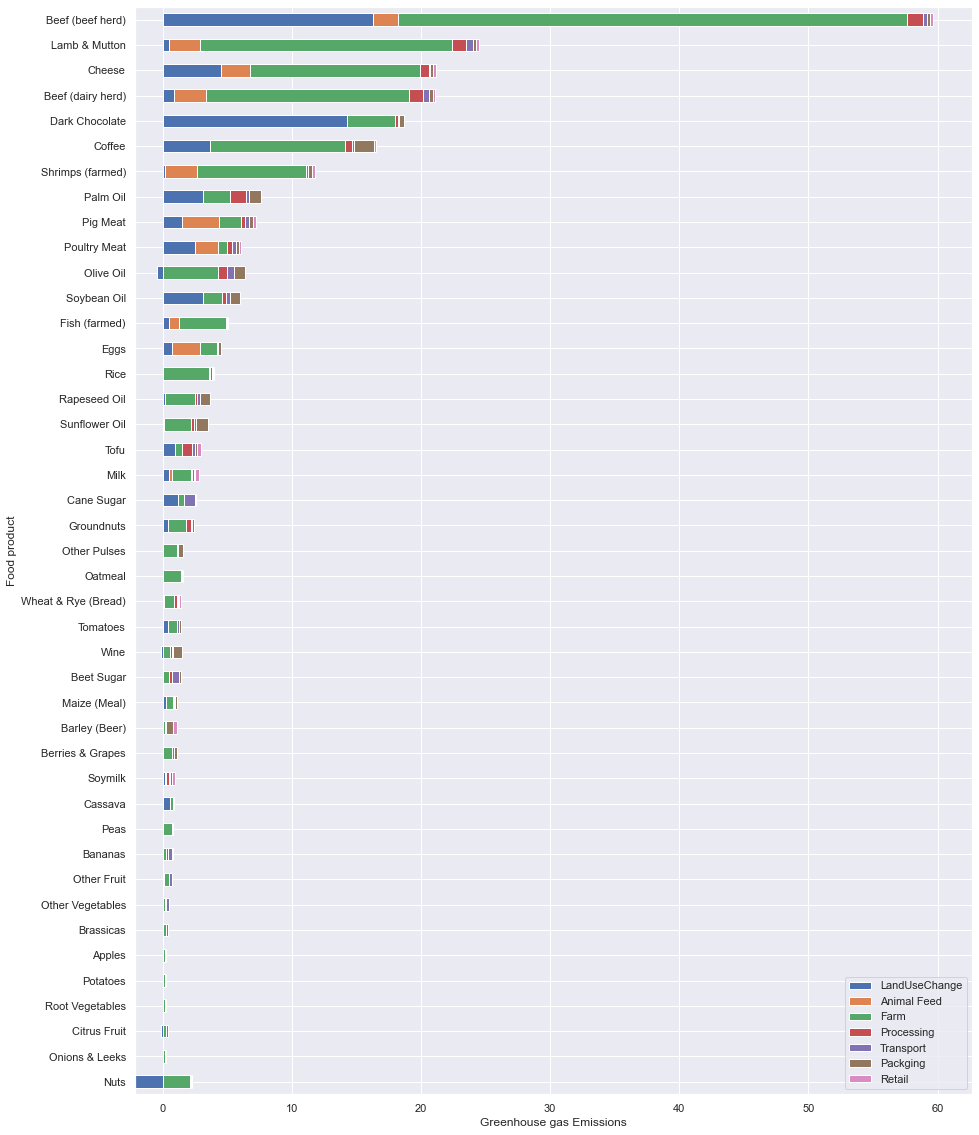

In [29]:
df_Food_Production.reset_index(inplace=True)
temp_df= df_Food_Production.sort_values(by= "TotalEmissions", ascending= True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.grid(True)
plt.show()

We can resume these points:
* Most of the greenhouse gas emissions happen in the farm which is way high for beef farming.
* CO2 emissions from most plant based Foods are much lower than most animal based foods. #Govegan
* Factors such as Transport, distance, retail , packaging are often unremarkable compared to importance of food type.


<a id="4.1.3."> </a>
#### 4.1.3. Impact of land use on emissions

The amount of land required to produce food has wide variation depending upon the type of food. Let's compare the land use by foods in terms of amount of food produced per kg and nutrituional values.

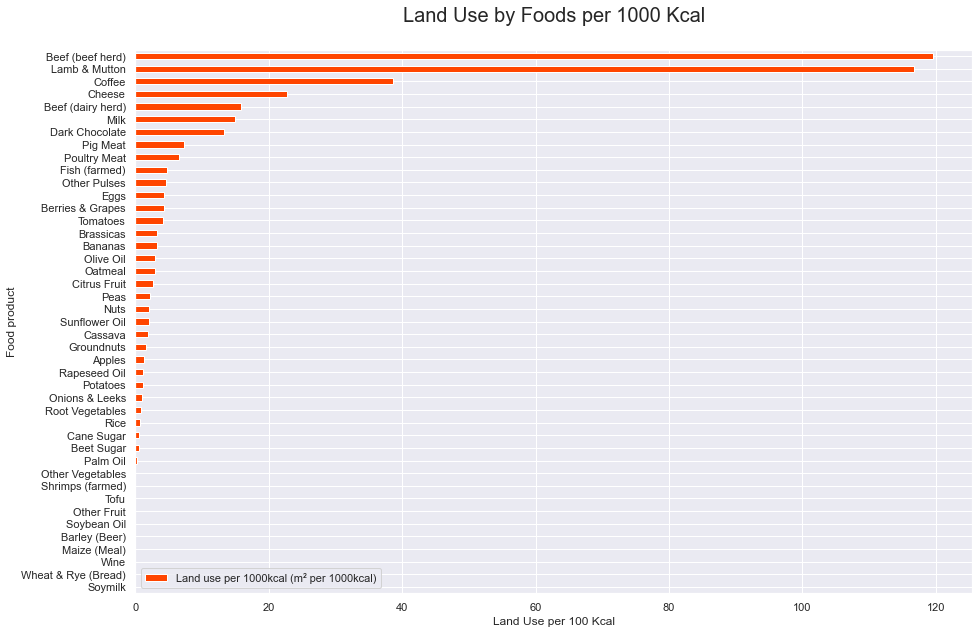

In [30]:
# comparing different foods by land use per 1000Kcal
land_df= df_Food_Production.dropna().sort_values(by= "Land use per 1000kcal (m² per 1000kcal)", ascending= True)[["Food product","Land use per 1000kcal (m² per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "orangered")
plt.xlabel("Land Use per 100 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 20)
plt.grid(True)
plt.show()

As expected, most of the land is used in the cultivation of beef, lamb & mutton while all the plant based foods are at the bottom. A great plus point for vegan nutrition

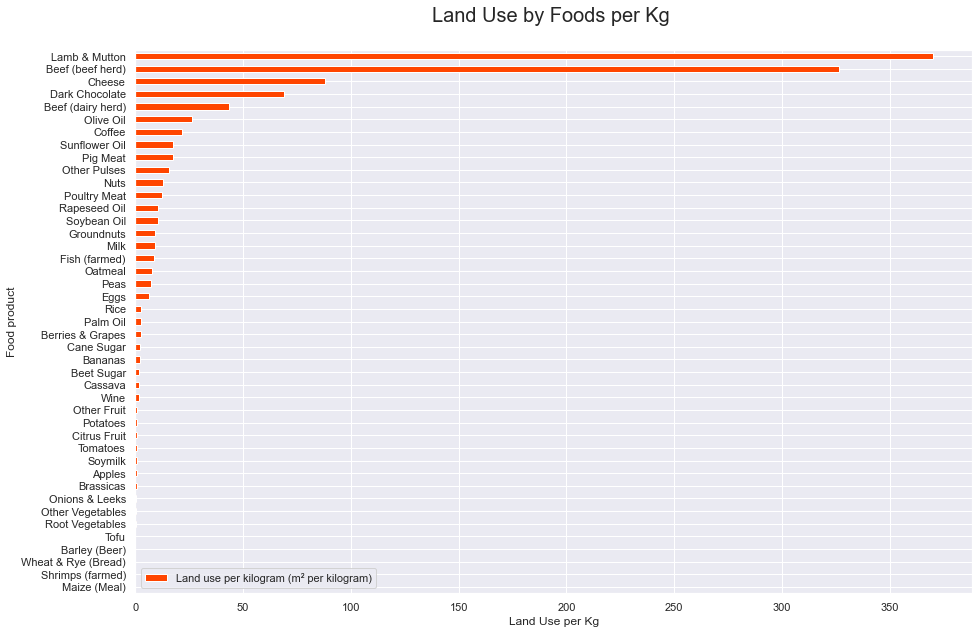

In [31]:
# comparing different foods by land use per kg
land_df= df_Food_Production.dropna().sort_values(by= "Land use per kilogram (m² per kilogram)", ascending= True)[["Food product","Land use per kilogram (m² per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "orangered")
plt.xlabel("Land Use per Kg")
plt.title("Land Use by Foods per Kg \n", size= 20)
plt.grid(True)
plt.show()

Interestingly, more land is used by lamb & mutton to produce the same amount of food than beef

<a id="4.1.4."> </a>
#### 4.1.4. Impact of water usage on emissions

Water is a critical resource required for food production and other activities. It's important to know which types of food require more water to produce it. We will investigate which types of food have high scarcity-weighted water usage meaning more usage of water in areas where water resource is scarce.

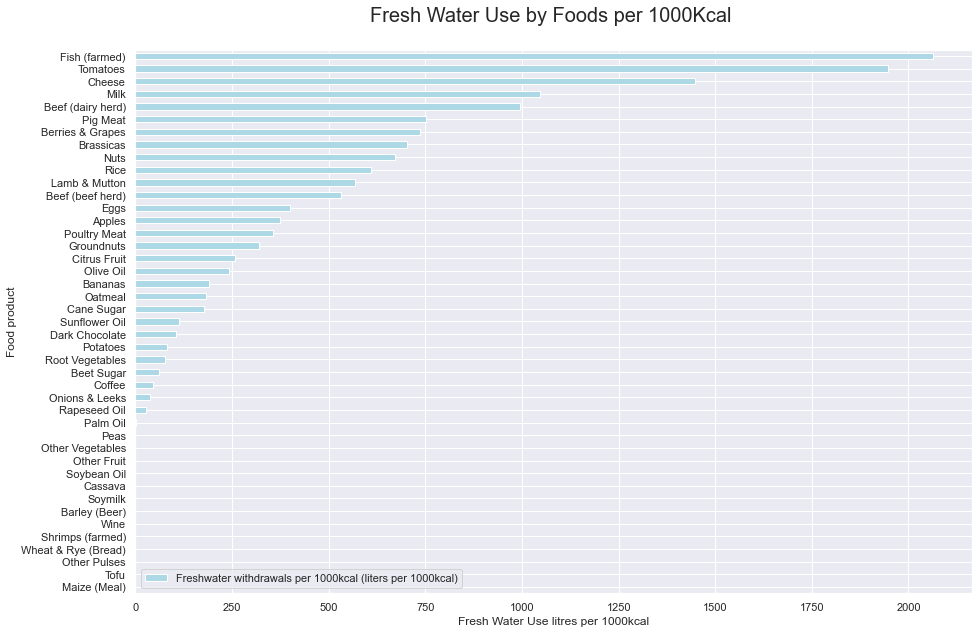

In [32]:
# comparing different foods by fresh water per 1000Kcal
water_df= df_Food_Production.dropna().sort_values(by= "Freshwater withdrawals per 1000kcal (liters per 1000kcal)", ascending= True)[["Food product","Freshwater withdrawals per 1000kcal (liters per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per 1000kcal")
plt.title("Fresh Water Use by Foods per 1000Kcal \n", size= 20)
plt.grid(True)
plt.show()

Two considerations here:
* Most of the fresh water usage in litres per 1000 Kcal of food is done by fish, tomatoes and dairy products.
* Potatoes, root vegetables, coffee and onions are some of the foods which require very less water in terms of nutritional values.

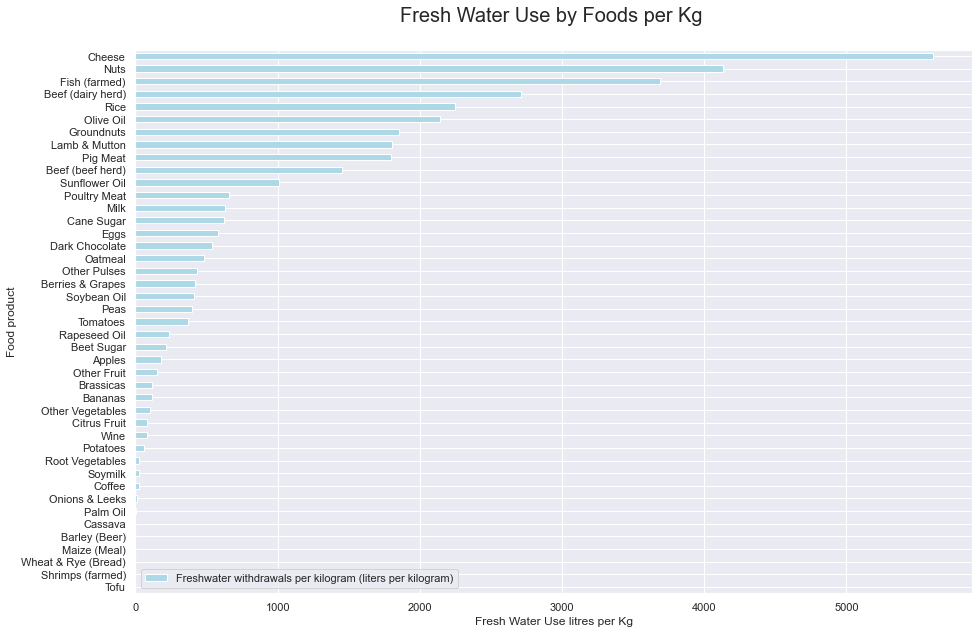

In [33]:
# comparing different foods by fresh water per kg
water_df= df_Food_Production.dropna().sort_values(by= "Freshwater withdrawals per kilogram (liters per kilogram)", ascending= True)[["Food product","Freshwater withdrawals per kilogram (liters per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 20)
plt.grid(True)
plt.show()

Cheese and Nuts need more water to produce the same amount(1 kg) of food than fish which takes more water if we compare them by amount of energy produced.

<a id="4.1.5."> </a>
#### 4.1.5. Greenhouse Emissions

A greenhouse gas is a gas that absorbs and emits radiant energy within the thermal infrared range. Greenhouse gases cause the greenhouse effect on planet. The primary greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone(font: Wikipedia).

Different Food have different carbon footprint across various stages of it's production and consumption. Let's compare.

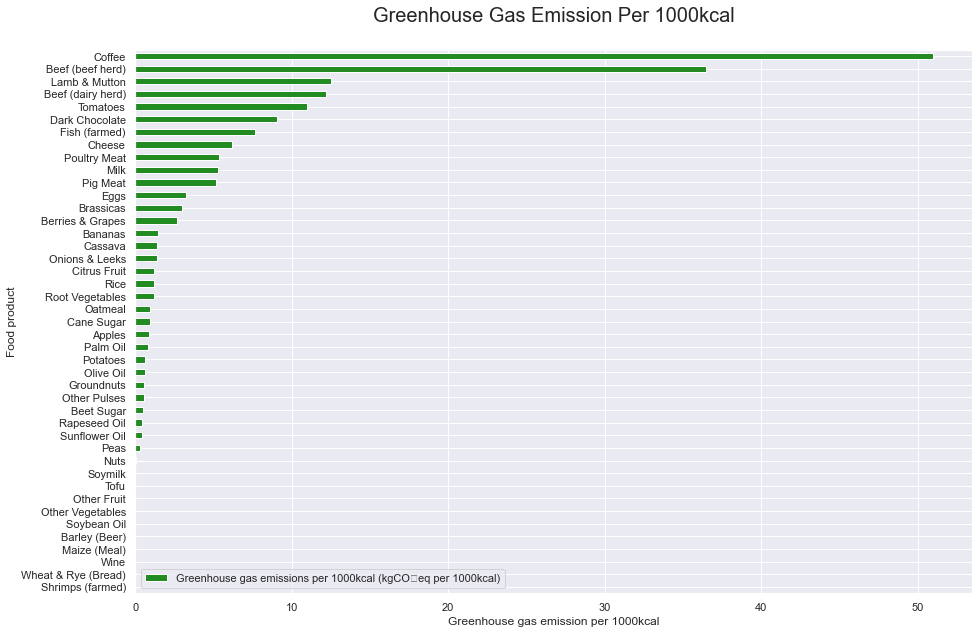

In [34]:
# comparing different foods by greenhouse gas emission per 1000Kcal
emission_df= df_Food_Production.dropna().sort_values(by= "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)", ascending= True)[["Food product","Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "forestgreen")
plt.xlabel("Greenhouse gas emission per 1000kcal")
plt.title("Greenhouse Gas Emission Per 1000kcal\n", size= 20)
plt.grid(True)
plt.show()

We notice that:
* Coffee has the most carbon footprint per 1000kcal followed by beef which is not surprising.
* Animal based foods produce around 50% more emissions than plant based foods like potatoes, apples, groundnuts. I think this is the biggest advantage of vegan eating.

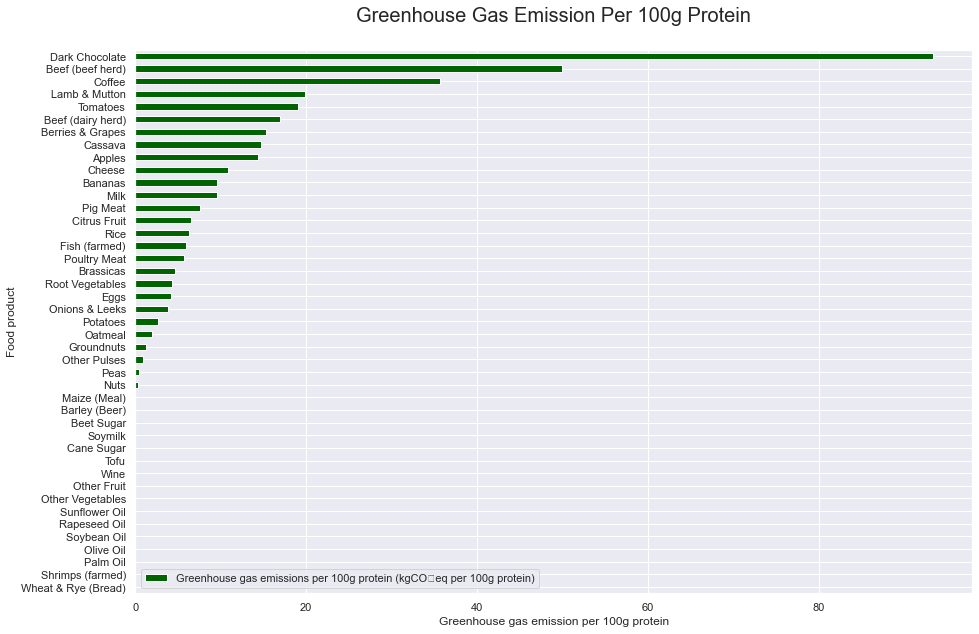

In [35]:
# comparing different foods by greenhouse gas emission per 100g protein
emission_df= df_Food_Production.dropna().sort_values(by= "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)", ascending= True)[["Food product","Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 100g protein")
plt.title("Greenhouse Gas Emission Per 100g Protein\n", size= 20)
plt.grid(True)
plt.show()

Dark chocolate has most carbon footprint in terms of nutritional values(per 100g protein). It's a blow to the gluttonous

<a id="4.1.6."> </a>
#### 4.1.6. Scarcity-weighted water use

Freshwater scarcity varies across the world: some regions have abundant water resources which does not impact agricultural demands while others experience severe water stress. Scarcity-weighted water use represents freshwater use weighted by local water scarcity.

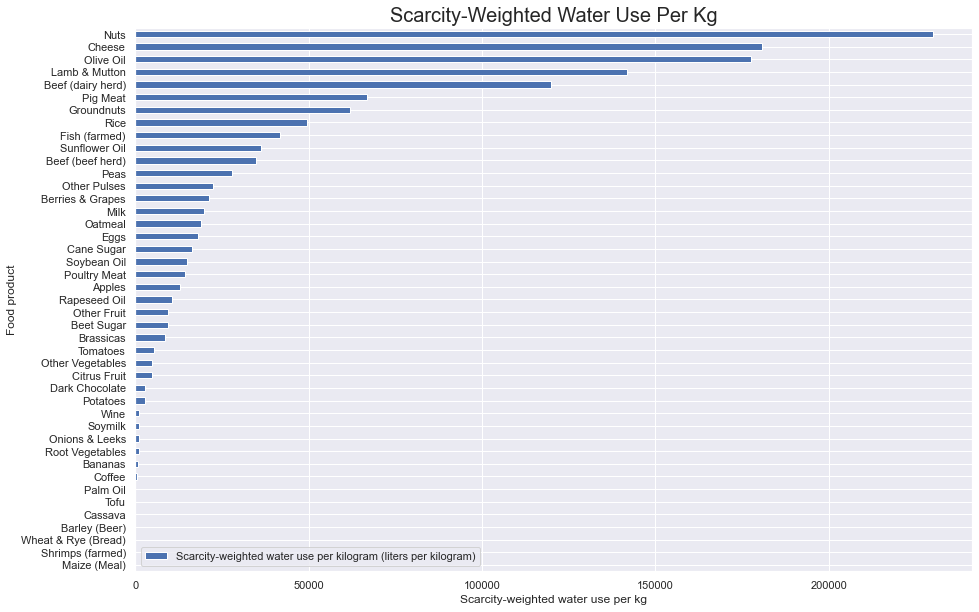

In [36]:
# comparing different foods by scarcity-weighted water required to produce 1 kg food
scarcity_df= df_Food_Production.dropna().sort_values(by= "Scarcity-weighted water use per kilogram (liters per kilogram)", ascending= True)[["Food product","Scarcity-weighted water use per kilogram (liters per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax)
plt.xlabel("Scarcity-weighted water use per kg")
plt.title("Scarcity-Weighted Water Use Per Kg", size= 20)
plt.grid(True)
plt.show()

We can see that in order to produce 1kg of food in water scarce areas, nuts and cheese use more water

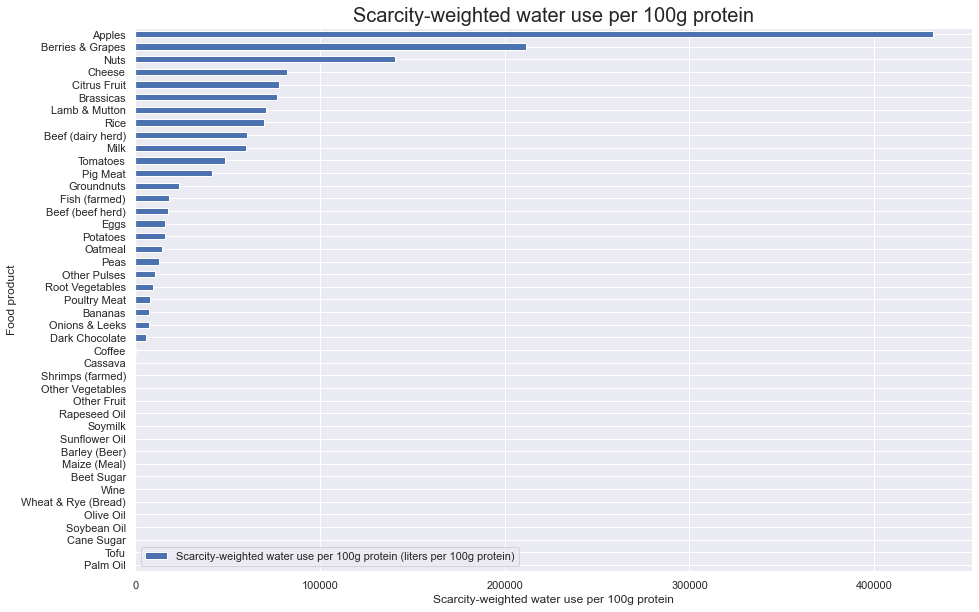

In [37]:
# comparing different foods by scarcity-weighted water in terms of nutritional values
scarcity_df= df_Food_Production.dropna().sort_values(by= 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', ascending= True)[['Food product',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel('Scarcity-weighted water use per 100g protein')
plt.title('Scarcity-weighted water use per 100g protein', size= 20)
plt.grid(True)
plt.show()

Apples and berries use more water in water scarce areas to produce same amount of nutritional content. It's an important insight to consider in areas where water is scarce.

<a id="4.1.7."> </a>
#### 4.1.7. Eutrophication

The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor to environmental pollution. Let's compare different foods in terms of eutrophication

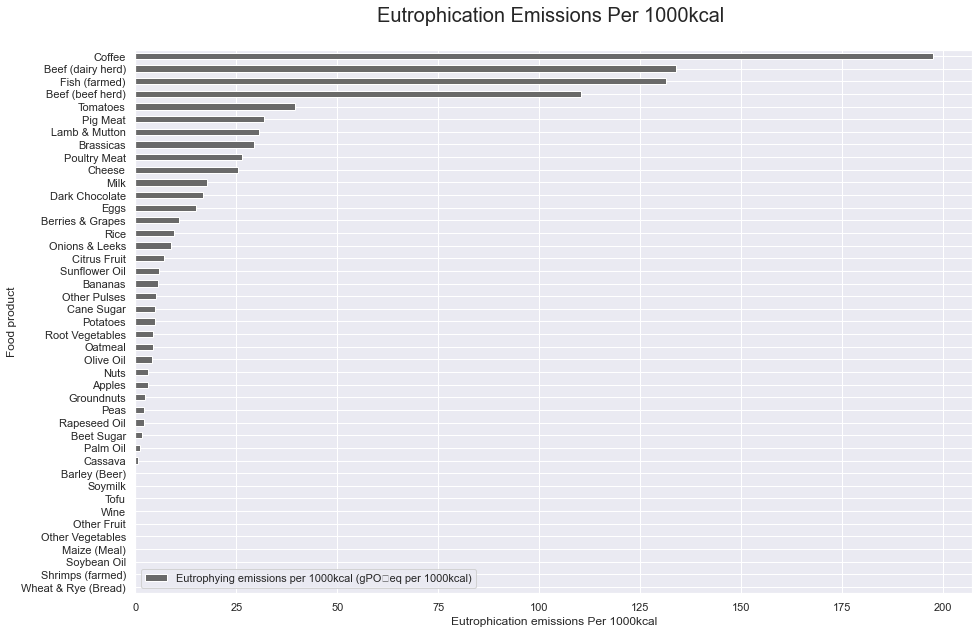

In [38]:
#comparing eutrophication emissions per 1000kcal
eutrophication_df= df_Food_Production.dropna().sort_values(by= "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)", ascending= True)[["Food product","Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "dimgray")
plt.xlabel("Eutrophication emissions Per 1000kcal")
plt.title("Eutrophication Emissions Per 1000kcal \n", size= 20)
plt.grid(True)
plt.show()

Coffee does the most eutrophication emission compared by energy per 1000kcal. Most of the plant based foods are at the bottom. Another point in favor of vegan nutrition

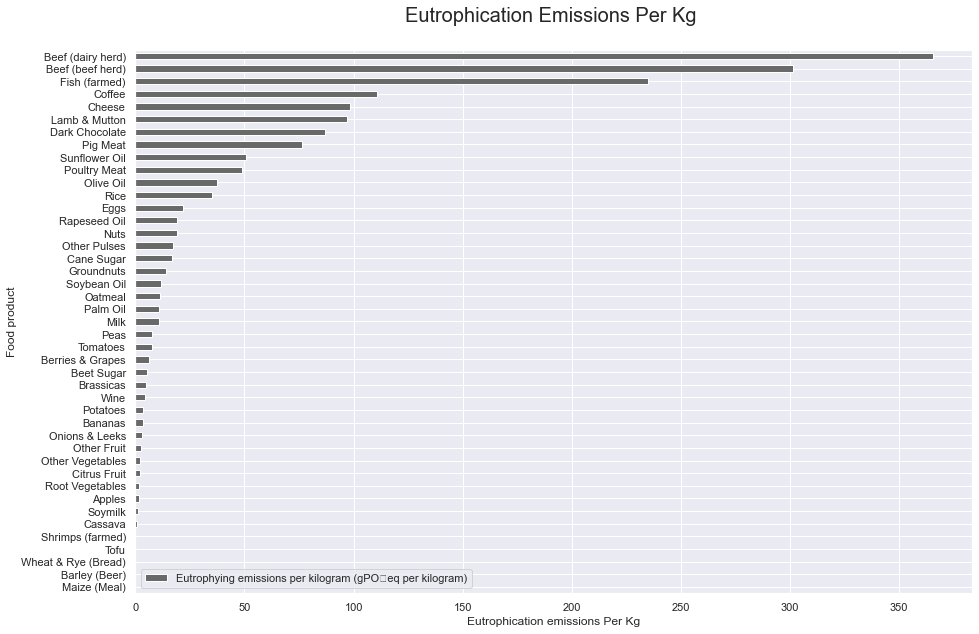

In [39]:
#comparing eutrophication emissions of different foods required to produce 1 kg food
eutrophication_df= df_Food_Production.dropna().sort_values(by= "Eutrophying emissions per kilogram (gPO₄eq per kilogram)", ascending= True)[["Food product","Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "dimgray")
plt.xlabel("Eutrophication emissions Per Kg")
plt.title("Eutrophication Emissions Per Kg \n", size= 20)
plt.grid(True)
plt.show()

Animal based foods are most responsible for eutrophication emission to produce 1kg while plant-based foods contibute very less.

<a id="5.1."> </a>
#### 5.1. Correlation: which variables influence total emissions?

Correlation values range between -1 and 1. There are two key components of a correlation value:

    magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
    sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, covariance tells you how two variables vary together.

After this brief recap, let's have a closer look to these properties applied on our dataset. Also in this case, I will consider a subset of the entire dataset.


First of all, we manipulate our dataset dropping some columns and renaming others in order to simplify the analysis.The subset othe entire dataframe now looks like this:

In [40]:
#modify the dataset by erasing many columns and renaming others in order to simplify this analysis
df_Food_Production.set_index("Food product", inplace=True)

columns_to_delete = ["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)",
                    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)",
                    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
                    "Freshwater withdrawals per 100g protein (liters per 100g protein)",
                    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)",
                    "Land use per 1000kcal (m² per 1000kcal)",
                    "Land use per 100g protein (m² per 100g protein)",
                    "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
                    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"]

df_Food_Production = df_Food_Production.drop(columns=columns_to_delete)

# Replace the columns headers with a very long name with a shorter name
df_Food_Production.rename(columns = {"Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions",
                     "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals",
                     "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions",
                     "Land use per kilogram (m² per kilogram)": "LandUse",
                     "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse"}, 
          inplace = True)

df_stat = df_Food_Production.loc[:, "TotalEmissions" : "ScarcityWeightedWaterUse"]
df_stat.head()

TotalEmissions  EutrophyingEmissions  FreshwaterWithdrawals  \
Food product                                                                   
Nuts                        0.2                 19.15                 4133.8   
Onions & Leeks              0.3                  3.24                   14.3   
Citrus Fruit                0.3                  2.24                   82.7   
Root Vegetables             0.3                  1.61                   28.4   
Potatoes                    0.3                  3.48                   59.1   

                 GreenhouseGasEmissions  LandUse  ScarcityWeightedWaterUse  
Food product                                                                
Nuts                           0.069919    12.96                  229889.8  
Onions & Leeks                 1.351351     0.39                     932.0  
Citrus Fruit                   1.218750     0.86                    4662.7  
Root Vegetables                1.162162     0.33                     929.2  
Potatoes                       0.628415     0.88                    2754.2

Correlation values range between -1 and 1. There are two key components of a correlation value:

* magnitude – larger is the magnitude (closer to 1 or -1), stronger is the correlation
* sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

After this brief recap, let's have a closer look to these properties applied on our dataset. 

In [41]:
df_stat.corr()

TotalEmissions  EutrophyingEmissions  \
TotalEmissions                  1.000000              0.751377   
EutrophyingEmissions            0.751377              1.000000   
FreshwaterWithdrawals           0.334524              0.522032   
GreenhouseGasEmissions          0.699204              0.595589   
LandUse                         0.824595              0.522653   
ScarcityWeightedWaterUse        0.268910              0.345495   

                          FreshwaterWithdrawals  GreenhouseGasEmissions  \
TotalEmissions                         0.334524                0.699204   
EutrophyingEmissions                   0.522032                0.595589   
FreshwaterWithdrawals                  1.000000                0.110238   
GreenhouseGasEmissions                 0.110238                1.000000   
LandUse                                0.287596                0.498148   
ScarcityWeightedWaterUse               0.855976                0.045816   

                           LandUse  ScarcityWeightedWaterUse  
TotalEmissions            0.824595                  0.268910  
EutrophyingEmissions      0.522653                  0.345495  
FreshwaterWithdrawals     0.287596                  0.855976  
GreenhouseGasEmissions    0.498148                  0.045816  
LandUse                   1.000000                  0.358504  
ScarcityWeightedWaterUse  0.358504                  1.000000

The above matrix tells us that all correlations are positive. The strongest correlation is between the total emissions values and the land use values (already supposed and foreseen in the previous section), whereas the least correlated values are between total emissions and scarcity weighted water use.<br>
Thus, the different measurements are inclined to vary in the same way (more or less all emissions progressively increse for the same food type).<br>
This can better show visually with a "coolwarm" heatmap and pairplot in order to check the relation between *total emission* with other five variables

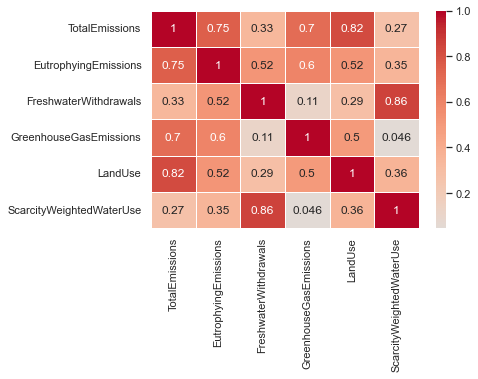

In [42]:
ax = sns.heatmap(df_stat.corr(),center=0, linewidths=.5, annot=True, cmap="coolwarm")

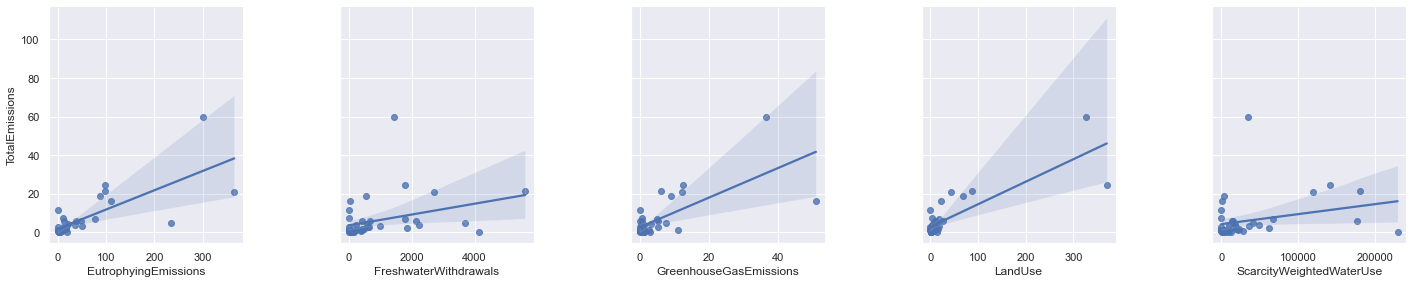

In [43]:
pairplot = sns.pairplot(df_stat,
                        height = 4,
                        aspect = 1,
                        
                        x_vars = ["EutrophyingEmissions","FreshwaterWithdrawals", 
                                  "GreenhouseGasEmissions", "LandUse",
                                  "ScarcityWeightedWaterUse"],
                        
                        y_vars = ["TotalEmissions"],
                        
                        kind = "reg")

pairplot.fig.subplots_adjust(wspace = 0.5 , hspace = 0.1)
plt.grid(True)
plt.show()

In this last analysis, I will try to see the relationship between three different variables (before we have correlated only two variables). Thus, I will plot on a 2D graph the values of Greenhouse Gas Emission (x-axes) and Land Use (y-axes). The third measurement, which in this case is Total Emission, will affect the marker's dimension.

In [44]:
plt.scatter(x = df_Food_Production["GreenhouseGasEmissions"],
            y = df_Food_Production["LandUse"], 
            color="green", 
            marker="o", 
            s=df_Food_Production["TotalEmissions"])
plt.xlabel("Greenhouse Gas Emissions")
plt.ylabel("LandUse")
plt.grid(True)
plt.show()

We notice that the data of the two columns plotted on x and y axis gets spread out for high values (means that the data covariance decreases), thus the measurements loose in correlation magnitude. Instead, we notice that the markers' dimension (=total emission) tend to expand with increase in land exploitation and greehouse gas emission.

<a id="3"> </a>
### Conclusion

There is a common theme in this analysis:the world population is growing and each country, in order to satisfy the increasing demand for food, is continuing to produce more and more without considering the environmental impact. Animal based foods use more resources and have higher carbon footprint than plant based diets. It's time to think about what we eat.We have to sharply consider to change our eating habits choosing  food wisely. Only in this way we could stay healthy and ensure a better planet in which live for future generations